# Hidden Markov Model Example

authors:<br>
Jacob Schreiber [<a href="mailto:jmschreiber91@gmail.com">jmschreiber91@gmail.com</a>]<br>
Nicholas Farn [<a href="mailto:nicholasfarn@gmail.com">nicholasfarn@gmail.com</a>]

A simple example highlighting how to build a model using states, add
transitions, and then run the algorithms, including showing how training
on a sequence improves the probability of the sequence.

In [1]:
import random
from pomegranate import *

random.seed(0)

First we will create the states of the model, one uniform and one normal.

In [2]:
state1 = State( UniformDistribution(0.0, 1.0), name="uniform" )
state2 = State( NormalDistribution(0, 2), name="normal" )

We will then create the model by creating a HiddenMarkovModel instance. Then we will add the states.

In [3]:
model = HiddenMarkovModel( name="ExampleModel" )
model.add_state( state1 )
model.add_state( state2 )

Now we'll add the start states to the model.

In [4]:
model.add_transition( model.start, state1, 0.5 )
model.add_transition( model.start, state2, 0.5 )

And the transition matrix.

In [5]:
model.add_transition( state1, state1, 0.4 )
model.add_transition( state1, state2, 0.4 )
model.add_transition( state2, state2, 0.4 )
model.add_transition( state2, state1, 0.4 )

Finally the ending states to the model.

In [6]:
model.add_transition( state1, model.end, 0.2 )
model.add_transition( state2, model.end, 0.2 )

To finalize the model, we "bake" it.

In [7]:
model.bake()

New we'll create a sample sequence using our model.

In [32]:
sequence = model.sample()
print (sequence)

[-0.6231050642547453, 0.11233068445949088, 0.8289400292173631, 0.004695476192547066, 0.6778165367962301, 0.27000797319216485, 0.9313248794609197, -3.0724873725544475, 2.9765043875911994, 0.2230816326406183, 0.952749011516985, 0.44712537861762736]


Now we'll feed the sequence through a forward algorithm with our model.

In [34]:
print (model.forward( sequence )[ len(sequence), model.end_index ])

-17.982373726233146


Next we'll do the same, except with a backwards algorithm.

In [35]:
print (model.backward( sequence )[0,model.start_index])

-17.982373726233142


Then we'll feed the sequence again, through a forward-backward algorithm.

In [36]:
trans, ems = model.forward_backward( sequence )
print (trans)
print (ems)

[[1.66194681 2.61709257 0.         0.16286334]
 [1.77995592 4.9410047  0.         0.83713666]
 [1.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
[[ 3.55271368e-15            -inf]
 [-1.79528160e+00 -1.81618616e-01]
 [-1.86607697e+00 -1.68098562e-01]
 [-1.79396875e+00 -1.81880285e-01]
 [-1.84207112e+00 -1.72555999e-01]
 [-1.80156975e+00 -1.80370997e-01]
 [-1.88515229e+00 -1.64645824e-01]
 [-3.55271368e-15            -inf]
 [ 0.00000000e+00            -inf]
 [-1.79915532e+00 -1.80848928e-01]
 [-1.88943356e+00 -1.63881512e-01]
 [-1.81484381e+00 -1.77767954e-01]]


In [41]:
[sequence]

[[-0.6231050642547453,
  0.11233068445949088,
  0.8289400292173631,
  0.004695476192547066,
  0.6778165367962301,
  0.27000797319216485,
  0.9313248794609197,
  -3.0724873725544475,
  2.9765043875911994,
  0.2230816326406183,
  0.952749011516985,
  0.44712537861762736]]

Finally we'll train our model with our example sequence.

In [37]:
model.fit( [ sequence ] )

{
    "class" : "HiddenMarkovModel",
    "name" : "ExampleModel",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "ExampleModel-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "ExampleModel-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    -0.16888214867298015,
                    2.366303950112878
                ],
                "frozen" : false
            },
            "name" : "normal",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "UniformDistribution",
                "parameters" : [
                    0.00469547

Then repeat the algorithms we fed the sequence through before on our improved model.

In [39]:
print ("Forward")
print (model.forward( sequence )[ len(sequence), model.end_index ])
print()
print ("Backward")
print (model.backward( sequence )[ 0,model.start_index ])
print ()
trans, ems = model.forward_backward( sequence )
print (trans)
print (ems)

Forward
-14.26467638032539

Backward
-14.264676380325394

[[1.24096653e+00 2.10006608e+00 0.00000000e+00 1.20056464e-12]
 [1.10006608e+00 6.55890131e+00 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]
[[-3.55271368e-15            -inf]
 [-2.58025939e+00 -7.87773895e-02]
 [-3.69618105e+00 -2.51312869e-02]
 [-3.72189120e+00 -2.44855184e-02]
 [-3.77565136e+00 -2.31889527e-02]
 [-3.64282937e+00 -2.65269195e-02]
 [-2.67071958e+00 -7.17134375e-02]
 [ 1.77635684e-15            -inf]
 [ 1.77635684e-15            -inf]
 [-2.58992057e+00 -7.79896487e-02]
 [-3.77473303e+00 -2.32105067e-02]
 [-2.74482291e+01 -1.20081722e-12]]


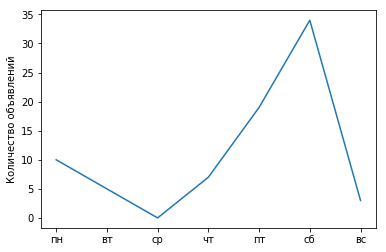

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot([10, 5, 0, 7, 19, 34, 3])
plt.xticks(range(7), ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])
plt.ylabel('Количество объявлений')
plt.show()